<h1>Exercício 1</h1>
<BR>
<h2>

# Bibliotecas

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pca import pca

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

sns.set_style('whitegrid')
sns.set_context('notebook')

import warnings
warnings.filterwarnings('ignore')


## Funções Auxiliares

In [2]:
def percentual_outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) | (data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

def calculate_wcss(data, num):
        wcss = []
        for n in range(2, num):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
    
        return wcss
    
def calculate_silhouete(data, num):
        silhouete_avg = []
        for n in range(2, num):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            cluster_labels = kmeans.labels_
            silhouete_avg.append(silhouette_score(data, cluster_labels))
    
        return silhouete_avg

def spider_plot_unico(data, cluster):
    means = data.groupby('kmeans').mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection="polar")
    ax.plot(label_loc, means[cluster], label=f'class {categories[cluster]}')
    ax.set_title(f'Cluster {cluster}', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.show()
    
def spider_plot(data):
    means = data.groupby('kmeans').mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    fig = plt.figure(figsize=(14,14))
    ax = fig.add_subplot(projection="polar")
    for i in range(len(means)):
        ax.plot(label_loc, means[i], label=f'class {categories[i]}')
        ax.set_title(f'Cluster {i}', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend(loc="lower left")
    plt.show()
    
def spider_plot_YYY(data, cluster):
    means = data.groupby('kmeans').mean().to_numpy()
    names = data.columns[0:-1]
    means = np.c_[means, np.zeros(5)]
    names = np.r_[names, ['']]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(projection="polar")
    #for i in range(len(means)):
    ax.plot(label_loc, means[cluster], label=f'class {categories[cluster]}')
    ax.set_title(f'Cluster {cluster}', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    #plt.legend(loc="lower left")
    plt.show()

def spider_plot_rt(data, cluster):
    NaN_array = np.empty((5))
    NaN_array[:] = np.NaN
    means = np.c_[data.groupby('kmeans').mean().to_numpy(), NaN_array]
    names = np.r_[data.columns[0:-1], ['']]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(projection="polar")
    ax.plot(label_loc, means[cluster], label=f'class {categories[cluster]}')
    ax.set_title(f'Cluster {cluster}', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.show()    
    

# Carregando os Dados

## Vamos utilizar nesta análise a base montada no notebook de análise inicial do dados.

In [3]:

df = pd.read_csv("./df_pre_processado.csv")

In [4]:
explore(df)

dtypes  count  null_sum  null_pct  nunique  \
anoFundacao                  float64   6012         0     0.000       66   
ativoCirculante              float64   6012         0     0.000     1794   
capitalSocial                float64   6012         0     0.000      298   
cnpjSemTraco                  object   6012         0     0.000     1523   
custos                       float64   6012         0     0.000     1703   
dashboardCorrelacao          float64   6012         0     0.000      519   
dataAprovadoEmComite          object    443      5569     0.926      443   
dataAprovadoNivelAnalista     object   4652      1360     0.226     4652   
definicaoRisco                object   6012         0     0.000        4   
diferencaPercentualRisco     float64   6012         0     0.000       77   
duplicatasAReceber           float64   6012         0     0.000     1668   
empresa_MeEppMei                bool   6012         0     0.000        2   
endividamento                float64   6012         0     0.000     1185   
estoque                      float64   6012         0     0.000     1674   
faturamentoBruto             float64   6012         0     0.000     2605   
intervaloFundacao             object   6012         0     0.000        4   
limiteEmpresaAnaliseCredito  float64   6012         0     0.000     1478   
maiorAtraso                    int64   6012         0     0.000      153   
margemBruta                  float64   6012         0     0.000     1860   
margemBrutaAcumulada         float64   6012         0     0.000     1200   
nomeFantasia                  object   6012         0     0.000     1470   
numero_solicitacao             int64   6012         0     0.000     6012   
passivoCirculante            float64   6012         0     0.000     1789   
percentualProtestos          float64   5045       967     0.161        2   
percentualRisco              float64   6012         0     0.000       79   
periodoBalanco                object   6012         0     0.000      124   
periodoDemonstrativoEmMeses  float64   6012         0     0.000       12   
prazoMedioRecebimentoVendas    int64   6012         0     0.000      149   
primeiraCompra                object   5945        67     0.011     1207   
razaoSocial                   object   6012         0     0.000     1490   
restricoes                      bool   6012         0     0.000        2   
scorePontualidade            float64   6012         0     0.000      285   
status                        object   6012         0     0.000        7   
titulosEmAberto              float64   6012         0     0.000      563   
totalAtivo                   float64   6012         0     0.000     1788   
totalPatrimonioLiquido       float64   6012         0     0.000     1759   
valorAprovado                float64   5095       917     0.153      287   
valorSolicitado              float64   6012         0     0.000      318   

                                                   min         25%        50%  \
anoFundacao                                     1000.0      2000.0     2008.5   
ativoCirculante                                  -17.0    529853.0  3230248.0   
capitalSocial                                      0.0     95400.0   200000.0   
cnpjSemTraco                        AADG56617962174727           -          -   
custos                                    -346633805.0         0.0  1723174.0   
dashboardCorrelacao                           -0.99999         0.0        0.0   
dataAprovadoEmComite                                 -           -          -   
dataAprovadoNivelAnalista                            -           -          -   
definicaoRisco               De 0 a 10 % - Muito Baixo           -          -   
diferencaPercentualRisco                      0.207547    0.679245   0.785714   
duplicatasAReceber                         -22780710.0         0.0   878819.0   
empresa_MeEppMei                                 False         0.0        0.0   
endividament

<h1>
Retirando as variáveis que não iremos usar na análise de clusters
</h1>
<h2>
Entendemos que a análise requisitada pela empresa WTEC é para classificarmos os seus clientes em grupos com características comuns entre eles.<BR>
Portanto iremos retirar algumas informações que a empresa aplicou a eles.<BR>
1) numero_solicitação - não necessitamos de um index.<BR>
2) percentualProtestos - esta variável náo ajuda a explicar o problema pois possue 83% de zeros e 16,7% de nulos. Sobrando apenas 0,3% de dados válidos.<BR>
3) diferencaPercentualRisco - mesmos valores do percentualRisco.<BR>
4) dashboardCorrelacao - Não entedemos o seu objetivo.<BR>
5) Todas as variáveis de data, deixando apenas o ano da fundação (numérico).<BR>
6) As variáveis categoricas com nome fantasia e razão social.<BR> 
</h2>

In [5]:
df.drop(['valorAprovado', 'valorSolicitado', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'numero_solicitacao',
         'razaoSocial', 'nomeFantasia', 'status', 'definicaoRisco', 'anoFundacao', 'diferencaPercentualRisco', 'dashboardCorrelacao',
         'periodoBalanco', 'primeiraCompra', 'intervaloFundacao', 'periodoDemonstrativoEmMeses', 'percentualProtestos'], axis=1, inplace=True)

<h2>
Vamos retirar todos os CNPJs duplicados, pois queremos formar clusters com CNPJs únicos.<BR>
Para esta análise vamos manter sempre a entrada mais atualizada de cada cliente, a última dentro da base, pois a mesma está em ordem cronológica.<BR>
</h2>

In [6]:
df.drop_duplicates(subset='cnpjSemTraco', keep='last', inplace=True)

In [7]:
explore(df)

dtypes  count  null_sum  null_pct  nunique  \
ativoCirculante              float64   1523         0       0.0     1178   
capitalSocial                float64   1523         0       0.0      284   
cnpjSemTraco                  object   1523         0       0.0     1523   
custos                       float64   1523         0       0.0     1033   
duplicatasAReceber           float64   1523         0       0.0     1042   
empresa_MeEppMei                bool   1523         0       0.0        2   
endividamento                float64   1523         0       0.0      636   
estoque                      float64   1523         0       0.0     1105   
faturamentoBruto             float64   1523         0       0.0     1415   
limiteEmpresaAnaliseCredito  float64   1523         0       0.0      861   
maiorAtraso                    int64   1523         0       0.0      153   
margemBruta                  float64   1523         0       0.0     1068   
margemBrutaAcumulada         float64   1523         0       0.0     1200   
passivoCirculante            float64   1523         0       0.0     1168   
percentualRisco              float64   1523         0       0.0       63   
prazoMedioRecebimentoVendas    int64   1523         0       0.0      149   
restricoes                      bool   1523         0       0.0        2   
scorePontualidade            float64   1523         0       0.0      285   
titulosEmAberto              float64   1523         0       0.0      563   
totalAtivo                   float64   1523         0       0.0     1180   
totalPatrimonioLiquido       float64   1523         0       0.0     1166   

                                            min        25%        50%  \
ativoCirculante                             0.0   298293.0  2451304.0   
capitalSocial                               0.0    80000.0   150000.0   
cnpjSemTraco                 AADG56617962174727          -          -   
custos                                -431401.0        0.0  1565850.0   
duplicatasAReceber                  -22780710.0        0.0   567455.0   
empresa_MeEppMei                          False        0.0        0.0   
endividamento                               0.0        0.0        0.0   
estoque                                     0.0     8667.5   605595.0   
faturamentoBruto                            0.0  1672928.5  4925896.0   
limiteEmpresaAnaliseCredito                 0.0     9900.0    72600.0   
maiorAtraso                                   0        0.0        5.0   
margemBruta                        -614872100.0        0.0  1364721.0   
margemBrutaAcumulada                        0.0   0.220215   0.386633   
passivoCirculante                    -1134941.0    44519.5   779307.0   
percentualRisco                             0.0   0.142857   0.214286   
prazoMedioRecebimentoVendas                   0        0.0        0.0   
restricoes                                False        0.0        0.0   
scorePontualidade                           0.0   0.791796        1.0   
titulosEmAberto                             0.0        0.0        0.0   
totalAtivo                                  0.0   364756.0  2846875.0   
totalPatrimonioLiquido             -186719734.0    49100.5  1101916.0   

                                    75%                 max             mean  \
ativoCirculante              11347037.5       29038320000.0  53918426.858831   
capitalSocial                  600000.0        4100000000.0  16456989.209455   
cnpjSemTraco                          -  ZZVU59020803434073                -   
custos                        8736359.0        4393536000.0  41907151.246225   
duplicatasAReceber            3720666.0       20093580000.0  24822958.860801   
empresa_MeEppMei                    1.0                True         0.317137   
endividamento                  410269.0         740631476.0   4856513.224557   
estoque                       3524299.0        1293428000.0  12406042.209455   
faturamentoBruto             2

<h3>
Com estes tratamentos já temos uma base sem dados nulos (faltantes) e com apenas um CNPJ de cada cliente.
Agora vamos retirar o CNPJ da base para continuar a análise.
</h3>

In [8]:
df_num = df.drop(['cnpjSemTraco'], axis=1)

<h3>
Transformando as variáveis booleanas em númericas.
</h3>

In [9]:

df_num.restricoes = df_num.restricoes.apply(lambda x:1 if x else 0)
df_num.empresa_MeEppMei = df_num.empresa_MeEppMei.apply(lambda x:1 if x else 0)


In [10]:
explore(df_num)

dtypes  count  null_sum  null_pct  nunique  \
maiorAtraso                    int64   1523         0       0.0      153   
margemBrutaAcumulada         float64   1523         0       0.0     1200   
prazoMedioRecebimentoVendas    int64   1523         0       0.0      149   
titulosEmAberto              float64   1523         0       0.0      563   
percentualRisco              float64   1523         0       0.0       63   
ativoCirculante              float64   1523         0       0.0     1178   
passivoCirculante            float64   1523         0       0.0     1168   
totalAtivo                   float64   1523         0       0.0     1180   
totalPatrimonioLiquido       float64   1523         0       0.0     1166   
endividamento                float64   1523         0       0.0      636   
duplicatasAReceber           float64   1523         0       0.0     1042   
estoque                      float64   1523         0       0.0     1105   
faturamentoBruto             float64   1523         0       0.0     1415   
margemBruta                  float64   1523         0       0.0     1068   
custos                       float64   1523         0       0.0     1033   
capitalSocial                float64   1523         0       0.0      284   
restricoes                     int64   1523         0       0.0        2   
empresa_MeEppMei               int64   1523         0       0.0        2   
scorePontualidade            float64   1523         0       0.0      285   
limiteEmpresaAnaliseCredito  float64   1523         0       0.0      861   

                                     min          25%          50%  \
maiorAtraso                          0.0        0.000        5.000   
margemBrutaAcumulada                 0.0        0.220        0.387   
prazoMedioRecebimentoVendas          0.0        0.000        0.000   
titulosEmAberto                      0.0        0.000        0.000   
percentualRisco                      0.0        0.143        0.214   
ativoCirculante                      0.0   298293.000  2451304.000   
passivoCirculante             -1134941.0    44519.500   779307.000   
totalAtivo                           0.0   364756.000  2846875.000   
totalPatrimonioLiquido      -186719734.0    49100.500  1101916.000   
endividamento                        0.0        0.000        0.000   
duplicatasAReceber           -22780710.0        0.000   567455.000   
estoque                              0.0     8667.500   605595.000   
faturamentoBruto                     0.0  1672928.500  4925896.000   
margemBruta                 -614872100.0        0.000  1364721.000   
custos                         -431401.0        0.000  1565850.000   
capitalSocial                        0.0    80000.000   150000.000   
restricoes                           0.0        0.000        0.000   
empresa_MeEppMei                     0.0        0.000        0.000   
scorePontualidade                    0.0        0.792        1.000   
limiteEmpresaAnaliseCredito          0.0     9900.000    72600.000   

                                      75%           max          mean  \
maiorAtraso                  2.000000e+01  9.770000e+02  2.312500e+01   
margemBrutaAcumulada         4.950000e-01  1.000000e+00  3.400000e-01   
prazoMedioRecebimentoVendas  2.100000e+01  1.605000e+03  2.012000e+01   
titulosEmAberto              9.940000e+03  2.836656e+06  4.092816e+04   
percentualRisco              3.040000e-01  6.610000e-01  2.220000e-01   
ativoCirculante              1.134704e+07  2.903832e+10  5.391843e+07   
passivoCirculante            4.808169e+06  2.750382e+10  4.559232e+07   
totalAtivo                   1.291962e+07  5.482350e+10  9.602702e+07   
totalPatrimonioLiquido       5.735235e+06  1.292328e+10  3.247566e+07   
endividamento                4.102690e+05  7.406315e+08  4.856513e+06   
duplicatasAReceber           3.720666e+06  2.009358e+10  2.482296e+07   
estoque                      3.524299e+06  1.293428e+09  1.240604e+07   
faturamentoBr

<h3>
Temos agora uma base apenas numérica.<BR>
Vamos olhar a distribuição espacial destes dados, observando a média e desvio padrão de cada variável.
</h3>

In [11]:
fig = px.bar(data_frame = df_num.mean(), height=600, title='Banco de Dados Original - valores médios')
fig.show()

In [12]:
fig = px.bar(data_frame = df_num.std(), height=600, title='Banco de Dados Original - desvio padrão')
fig.show()

<h3>
Observando o gráfico acima percebemos que a escala de cada variável é muito diferente uma da outra.<BR>
Como iremos utilizar o Kmeans para fazer a clusterização, e ele utiliza as distâncias para calcular os clusters, vamos utilizar uma função MinMax para colocar todos os dados entre 0 e 1.<BR>
Não iremos retirar nenhum outlier ou extremo para esta análise pois acreditamos que eles podem formar um cluster.<BR>
</h3>

In [13]:
mmsc = MinMaxScaler().fit(df_num)
df_mmsc = pd.DataFrame(mmsc.transform(df_num), columns=df_num.columns)
df_mmsc

maiorAtraso  margemBrutaAcumulada  prazoMedioRecebimentoVendas  \
0        0.002047              0.000000                     0.000000   
1        0.007165              0.387733                     0.039252   
2        0.019447              0.000000                     0.000000   
3        0.028659              0.000000                     0.000000   
4        0.000000              0.385918                     0.000000   
...           ...                   ...                          ...   
1518     0.004094              0.536739                     0.017445   
1519     0.018424              0.374573                     0.027414   
1520     0.000000              0.462250                     0.000000   
1521     0.065507              0.426652                     0.039875   
1522     0.018424              0.490166                     0.029283   

      titulosEmAberto  percentualRisco  ativoCirculante  passivoCirculante  \
0            0.000000         0.428353         0.000015           0.000051   
1            0.003655         0.428353         0.000013           0.000074   
2            0.000000         0.485467         0.000025           0.000048   
3            0.000000         0.542580         0.000003           0.000052   
4            0.000000         0.428353         0.000031           0.000060   
...               ...              ...              ...                ...   
1518         0.002399         0.378378         0.000691           0.000702   
1519         0.031830         0.216216         0.000170           0.000188   
1520         0.000000         0.405405         0.000000           0.000041   
1521         0.449989         0.216216         0.001319           0.000589   
1522         0.011728         0.189189         0.000118           0.000082   

      totalAtivo  totalPatrimonioLiquido  endividamento  duplicatasAReceber  \
0       0.000008                0.014256       0.000000            0.001132   
1       0.000011                0.014278       0.000000            0.001139   
2       0.000013                0.014349       0.000000            0.001165   
3       0.000087                0.014585       0.000000            0.001292   
4       0.000017                0.014277       0.000000            0.001132   
...          ...                     ...            ...                 ...   
1518    0.000370                0.014387       0.000101            0.001693   
1519    0.000103                0.014312       0.001697            0.001305   
1520    0.000000                0.014243       0.000000            0.001132   
1521    0.000746                0.016196       0.000062            0.001917   
1522    0.000070                0.014451       0.000000            0.001255   

       estoque  faturamentoBruto  margemBruta    custos  capitalSocial  \
0     0.000155          0.000097     0.154423  0.000000       0.000010   
1     0.000164          0.000183     0.154424  0.000098       0.000012   
2     0.000000          0.000194     0.154500  0.000595       0.000024   
3     0.000924          0.000835     0.154762  0.000570       0.000122   
4     0.000479          0.000089     0.154424  0.000098       0.000020   
...        ...               ...          ...       ...            ...   
1518  0.004421          0.020740     0.165628  0.020278       0.000203   
1519  0.001018          0.000760     0.155007  0.000682       0.000007   
1520  0.000000          0.000839     0.154486  0.001269       0.000027   
1521  0.011786          0.018627     0.164115  0.018559       0.000488   
1522  0.000690          0.000731     0.155064  0.000588       0.000068   

      restricoes  empresa_MeEppMei  scorePontualidade  \
0            0.0               1.0           0.000000   
1            0.0               1.0           1.000000   
2            0.0               1.0           0.000000   
3            0.0               1.0           0.000000   
4            0.0               1.0           1.000000   
...          ...        

<h3>
Curva de Elbow e Silhouette para determinar o melhor K para o Kmeans.
</h3>

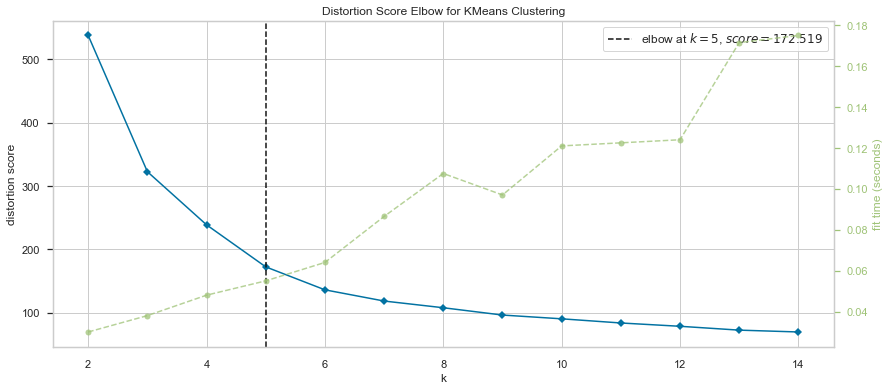

In [14]:
fig = plt.figure(figsize=(14,6))

model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,15))

distortion_visualizer.fit(df_mmsc)       
distortion_visualizer.show()
plt.show()

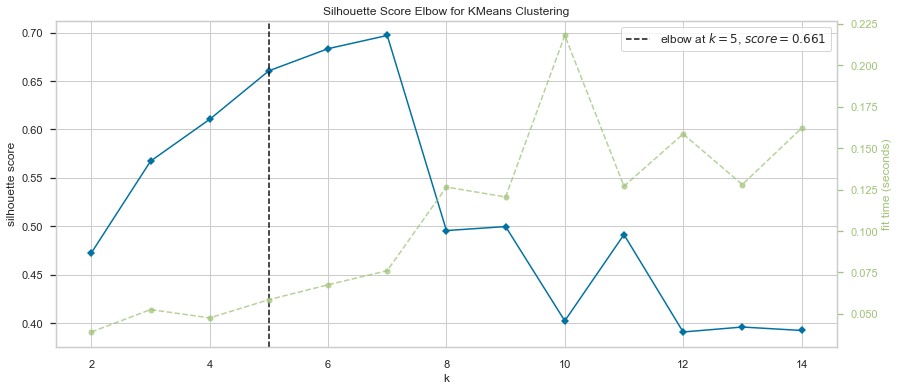

In [15]:
fig = plt.figure(figsize=(14,6))

model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, metric='silhouette',k=(2,15))

distortion_visualizer.fit(df_mmsc)       
distortion_visualizer.show()
plt.show()

<h3>
Conforme os gráficos acima vamos usar um K = 5.
</h3>

In [16]:
km = KMeans(n_clusters=5, n_init=100, max_iter=1000, algorithm='full', random_state=42)
km_labels = km.fit_predict(df_mmsc)

<h3>
Vamos colocar os valores dos clusters nas bases utilizadas.
</h3>

In [20]:
df_num['kmeans'] = km_labels
df_mmsc['kmeans'] = km_labels
df['kmeans'] = km_labels

df.to_csv("./df_ex1.csv", index=False)   

<h1>
Avaliação do Modelo
</h1>

<h2>
Vamos usar duas métricas para avaliar o modelo.
</h2>
<h3>
1) O Índice DAVIS-BOULDIN representa a similaridade entre os clusters e a distância dos mais próximos. Os valores variam de 0 para cima, e quanto mais perto de 0 melhor.<BR>
2) O coeficiente Silhouette varia entre -1 e 1. Quanto maior o valor melhor será po modelo. O valor 1 indica clusters bastante definidos e compactos e o valor 0 indica clausters sobrepostos. Valores negativos siginifica que o modelo não está compreendendo os dados.
</h3>

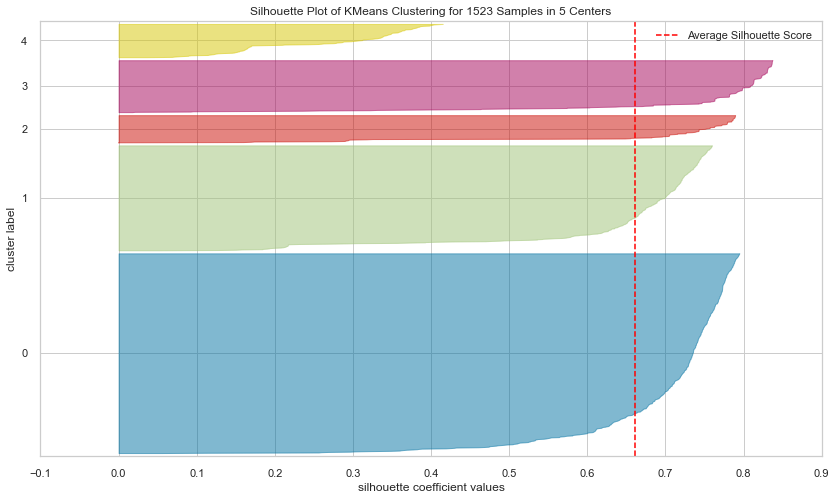

In [22]:
fig = plt.figure(figsize=(14,8))

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_mmsc.drop(['kmeans'],axis=1))
visualizer.show()
plt.show()

In [21]:
print(f'Davies-Bouldin index = {davies_bouldin_score(df_mmsc, km_labels)}')
print(f'Silhouette Score = {silhouette_score(df_mmsc, km_labels)}')

Davies-Bouldin index = 0.41200622030750117
Silhouette Score = 0.7604615914051375


<h2>
Pela métrica acima o nosso modelo performou muito bem.
</h2>

<h2>
Agora a vamos ver os nossos clusters!!!
</h2>

In [23]:
df.groupby('kmeans').maiorAtraso.count()

kmeans
0    728
1    383
2    100
3    190
4    122
Name: maiorAtraso, dtype: int64

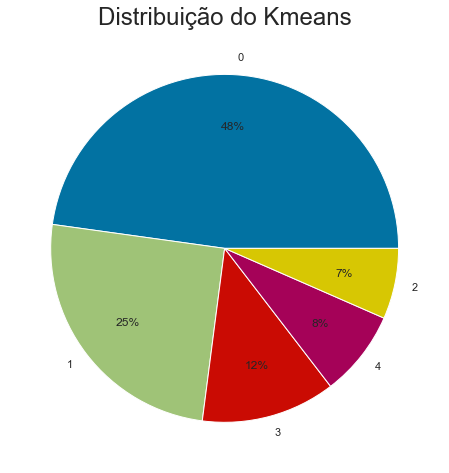

In [24]:
fig = plt.figure(figsize=(8,8))
df.kmeans.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)
plt.title('Distribuição do Kmeans', size=24)
plt.ylabel("")
plt.show()

<h2>
E agora quais variáveis foram mais importantes para a construção de cada cluster.
</h2>

In [25]:
# todas as variáveis do banco menos a identificação do cluster .
variaveis = df_mmsc.columns.tolist()[:-1]
centroides = np.abs(km.cluster_centers_)
for idx, cluster in enumerate(centroides):
    print(f"Cluster {idx} \n{cluster}")
    print('-'*60)

Cluster 0 
[2.62282497e-02 4.32858347e-01 1.64877957e-02 1.99770256e-02
 2.64298743e-01 6.67318871e-04 4.16228327e-04 4.99709689e-04
 1.50865124e-02 2.93007746e-03 1.45382216e-03 5.01106731e-03
 6.89341604e-03 1.58084571e-01 4.87707137e-03 2.01919181e-03
 1.38777878e-17 3.88578059e-16 9.75365367e-01 1.08081870e-03]
------------------------------------------------------------
Cluster 1 
[1.80790024e-02 4.21930730e-01 1.41463930e-02 1.16049020e-02
 4.52117865e-01 1.64230369e-04 1.15125178e-04 1.02533168e-04
 1.44518496e-02 4.70009430e-04 1.22838568e-03 1.36451347e-03
 1.48254941e-03 1.54880315e-01 1.69384569e-03 7.73866898e-05
 5.48302872e-02 1.00000000e+00 9.74202887e-01 2.06728329e-04]
------------------------------------------------------------
Cluster 2 
[1.91504606e-02 2.47087472e-02 2.12461059e-03 5.52540773e-04
 4.74242733e-01 1.39390752e-04 1.01116796e-04 8.12705413e-05
 1.44443948e-02 4.20635917e-04 1.20782240e-03 9.38951940e-04
 1.09427927e-03 1.55238294e-01 8.79654878e-04 5.08

In [26]:
index_variaveis_centroide_ordem = centroides.argsort(axis=1)[:,::-1]
for idx, cluster in enumerate(index_variaveis_centroide_ordem):
    print(f"Cluster {idx} \n{cluster}")
    print('-'*60)

Cluster 0 
[18  1  4 13  0  3  2  8 12 11 14  9 15 10 19  5  7  6 17 16]
------------------------------------------------------------
Cluster 1 
[17 18  4  1 13 16  0  8  2  3 14 12 11 10  9 19  5  6  7 15]
------------------------------------------------------------
Cluster 2 
[17  4 13 16  1 18  0  8  2 10 12 11 14  3  9  5  6  7 19 15]
------------------------------------------------------------
Cluster 3 
[ 4 13  8  1  0 12 18 14 15 11  6  9 10  7  5  3 19  2 16 17]
------------------------------------------------------------
Cluster 4 
[16 18  4  1 13 12 11 14  9  0 15  8  3 19  2  5  7  6 10 17]
------------------------------------------------------------


In [27]:
dimensao_variavel_centroide_ordem = np.take_along_axis(centroides, index_variaveis_centroide_ordem, axis=1)
for idx, cluster in enumerate(dimensao_variavel_centroide_ordem):
    print(f"Cluster {idx} \n{cluster}")
    print('-'*60)

Cluster 0 
[9.75365367e-01 4.32858347e-01 2.64298743e-01 1.58084571e-01
 2.62282497e-02 1.99770256e-02 1.64877957e-02 1.50865124e-02
 6.89341604e-03 5.01106731e-03 4.87707137e-03 2.93007746e-03
 2.01919181e-03 1.45382216e-03 1.08081870e-03 6.67318871e-04
 4.99709689e-04 4.16228327e-04 3.88578059e-16 1.38777878e-17]
------------------------------------------------------------
Cluster 1 
[1.00000000e+00 9.74202887e-01 4.52117865e-01 4.21930730e-01
 1.54880315e-01 5.48302872e-02 1.80790024e-02 1.44518496e-02
 1.41463930e-02 1.16049020e-02 1.69384569e-03 1.48254941e-03
 1.36451347e-03 1.22838568e-03 4.70009430e-04 2.06728329e-04
 1.64230369e-04 1.15125178e-04 1.02533168e-04 7.73866898e-05]
------------------------------------------------------------
Cluster 2 
[1.00000000e+00 4.74242733e-01 1.55238294e-01 7.00000000e-02
 2.47087472e-02 1.95275595e-02 1.91504606e-02 1.44443948e-02
 2.12461059e-03 1.20782240e-03 1.09427927e-03 9.38951940e-04
 8.79654878e-04 5.52540773e-04 4.20635917e-04 1.39

<h2>
E abaixo temos o resultado por cluster.<BR> 
As variáveis estão listadas por ordem de importância para a construção do cluster.
</h2>

In [28]:
numero_variaveis = 5

for x in range(len(centroides)):
    variaveis_centroide = centroides[x][index_variaveis_centroide_ordem[x]]
    print(f"Cluster {x}")
    for y in range(numero_variaveis):
        print(f"variável: {variaveis[index_variaveis_centroide_ordem[x][y]]} - peso: {round(variaveis_centroide[y], 4)}")
    print('-'*60)    

Cluster 0
variável: scorePontualidade - peso: 0.9754
variável: margemBrutaAcumulada - peso: 0.4329
variável: percentualRisco - peso: 0.2643
variável: margemBruta - peso: 0.1581
variável: maiorAtraso - peso: 0.0262
------------------------------------------------------------
Cluster 1
variável: empresa_MeEppMei - peso: 1.0
variável: scorePontualidade - peso: 0.9742
variável: percentualRisco - peso: 0.4521
variável: margemBrutaAcumulada - peso: 0.4219
variável: margemBruta - peso: 0.1549
------------------------------------------------------------
Cluster 2
variável: empresa_MeEppMei - peso: 1.0
variável: percentualRisco - peso: 0.4742
variável: margemBruta - peso: 0.1552
variável: restricoes - peso: 0.07
variável: margemBrutaAcumulada - peso: 0.0247
------------------------------------------------------------
Cluster 3
variável: percentualRisco - peso: 0.2609
variável: margemBruta - peso: 0.1606
variável: totalPatrimonioLiquido - peso: 0.0251
variável: margemBrutaAcumulada - peso: 0.023

<h3>
Apresentamos abaixo o Spyder Plot para cada Cluster, confirmando o relatório acima.
</h3>

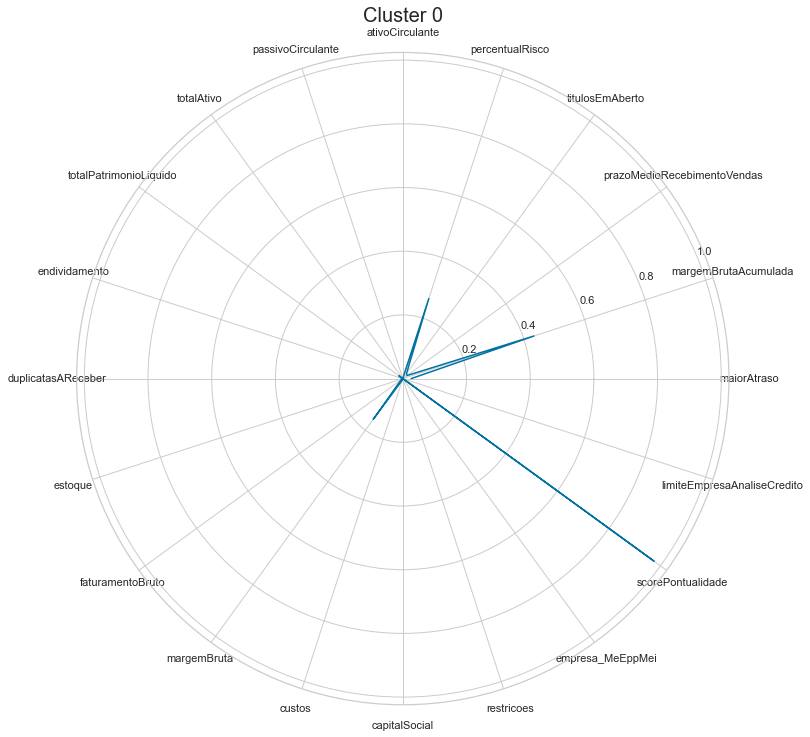

In [29]:
spider_plot_rt(df_mmsc, 0)

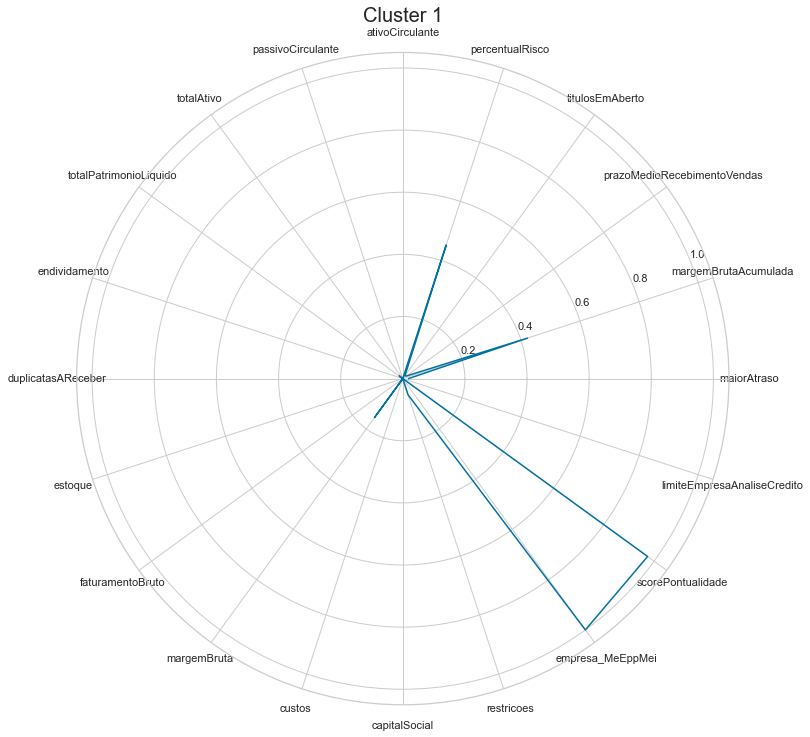

In [30]:
spider_plot_rt(df_mmsc , 1)

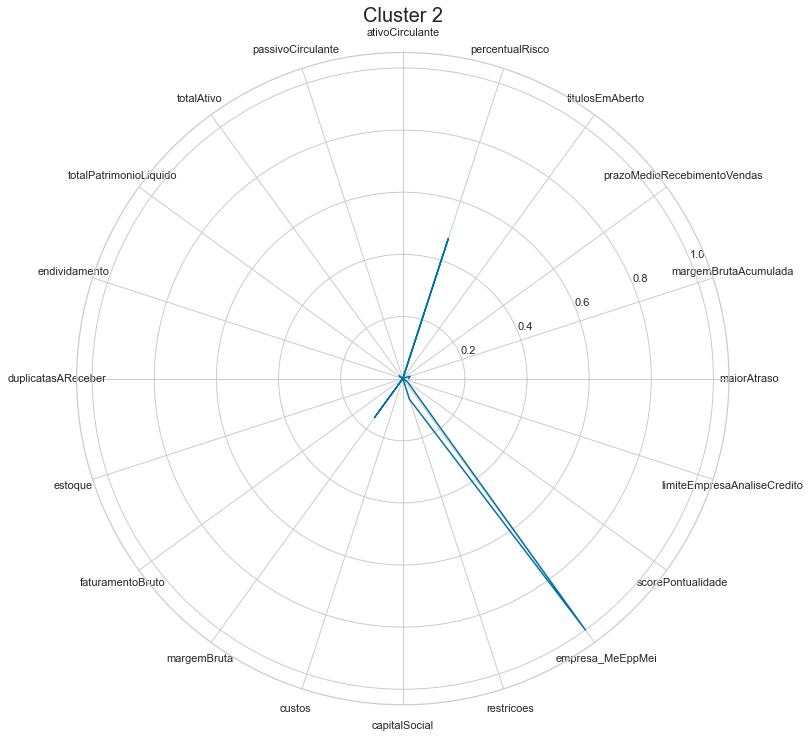

In [35]:
spider_plot_rt(df_mmsc, 2)

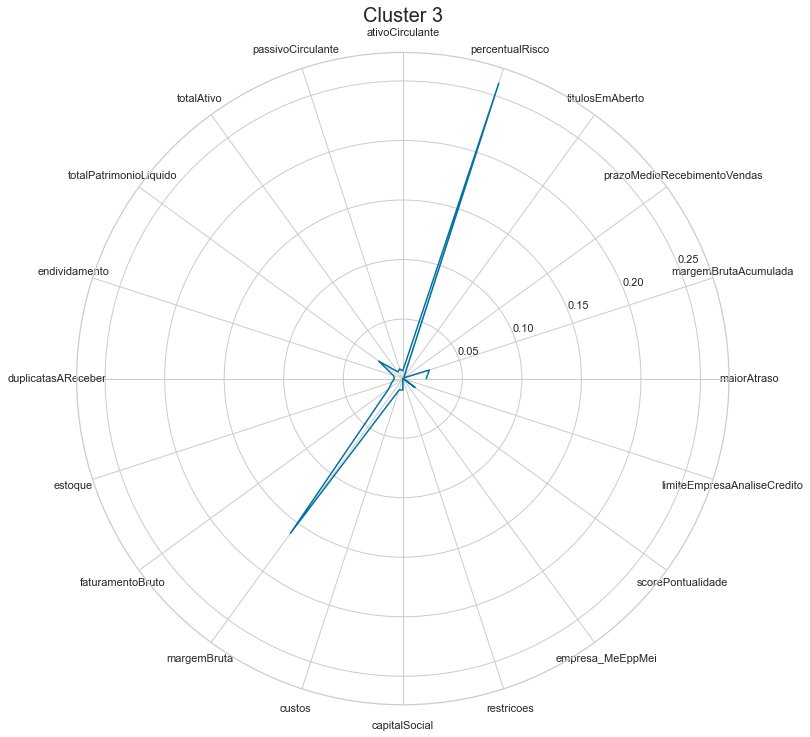

In [34]:
spider_plot_rt(df_mmsc, 3)

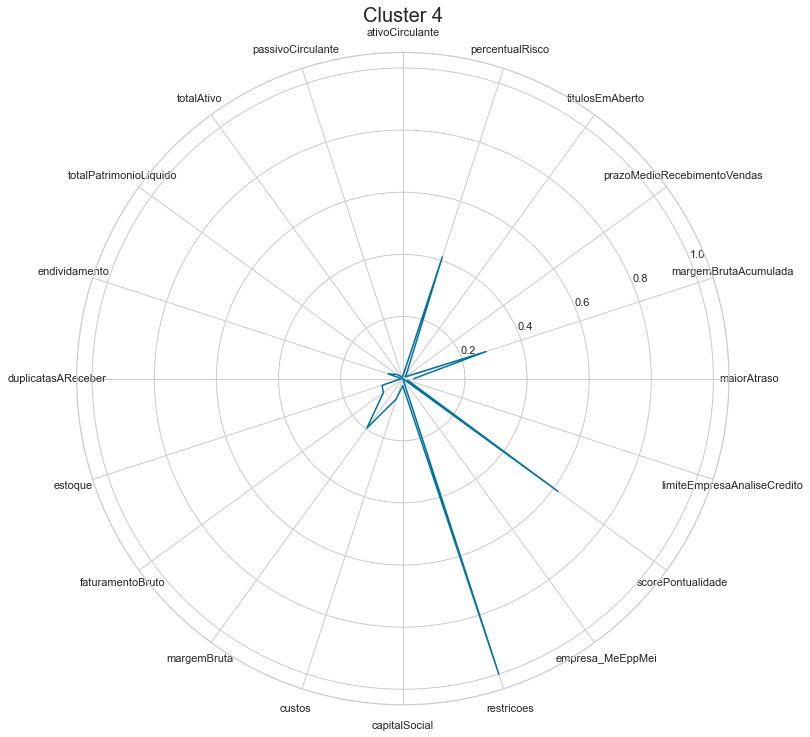

In [33]:
spider_plot_rt(df_mmsc, 4)